<a href="https://colab.research.google.com/github/Diacod-I/BrainDamage/blob/main/BusinessReport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pickle

In [117]:
ment = pd.read_csv('/content/Mental_Health_Care_in_the_Last_4_Weeks.csv')

In [118]:
ment.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [119]:
ment.Indicator.unique()

array(['Took Prescription Medication for Mental Health, Last 4 Weeks',
       'Received Counseling or Therapy, Last 4 Weeks',
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks',
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks'],
      dtype=object)

In [120]:
ment.Group.unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [121]:
ment.State.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [122]:
ment.Subgroup.unique()

array(['United States', '18 - 29 years', '30 - 39 years', '40 - 49 years',
       '50 - 59 years', '60 - 69 years', '70 - 79 years',
       '80 years and above', 'Male', 'Female',
       'Did not experience symptoms of anxiety/depression in the past 4 weeks',
       'Experienced symptoms of anxiety/depression in past 4 weeks',
       'Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races',
       'Less than a high school diploma', 'High school diploma or GED',
       "Some college/Associate's degree", "Bachelor's degree or higher",
       'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota

In [123]:
ment.Phase.unique()

array(['2', '3 (Oct 28 – Dec 21)', '-1', '3 (Jan 6 – Mar 29)', '3.1',
       '3.2', '3.3', '3.4'], dtype=object)

In [124]:
ment['Suppression Flag'].unique()

array([nan,  1.])

In [125]:
ment['Suppression Flag'].isna().sum()

10382

In [126]:
ment['Quartile Range'].isna().sum()

3672

In [127]:
len(ment)

10404

In [128]:
plt.style.use('dark_background')

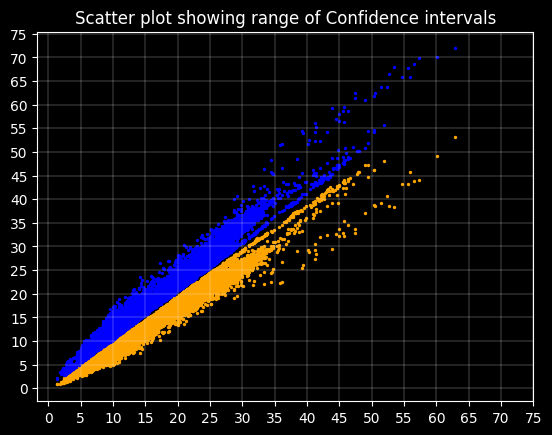

In [129]:
plt.scatter(ment.Value,ment['LowCI'],c='orange',s=2)
plt.scatter(ment.Value,ment['HighCI'],c='blue',s=2)
plt.title('Scatter plot showing range of Confidence intervals')
plt.xticks(np.arange(0,80,step=5))
plt.yticks(np.arange(0,80,step=5))
plt.grid(linewidth=0.2)
plt.show()

In [130]:
ment['HighCI'].max() - ment['LowCI'].min()

71.10000000000001

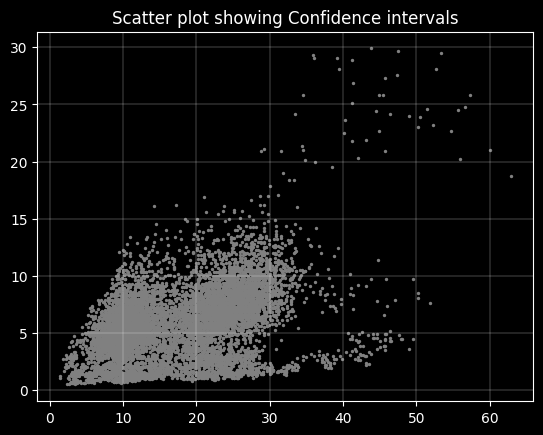

In [131]:
plt.scatter(ment.Value,ment['HighCI']-ment['LowCI'],c='gray',s=2)
plt.title('Scatter plot showing Confidence intervals')
plt.grid(linewidth=0.2)
plt.show()

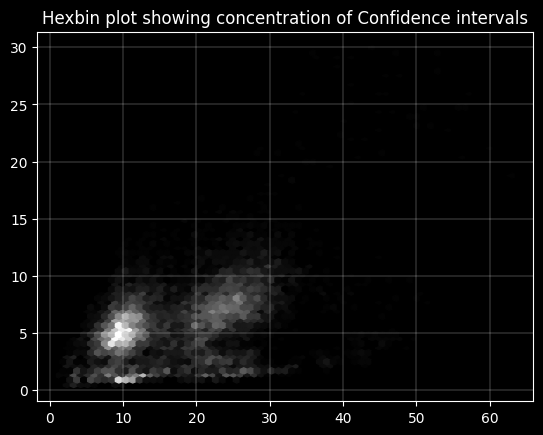

In [132]:
plt.hexbin(ment.Value,ment['HighCI']-ment['LowCI'],gridsize=65,cmap='gray')
plt.title('Hexbin plot showing concentration of Confidence intervals')
plt.grid(linewidth=0.2)
plt.show()

<Axes: >

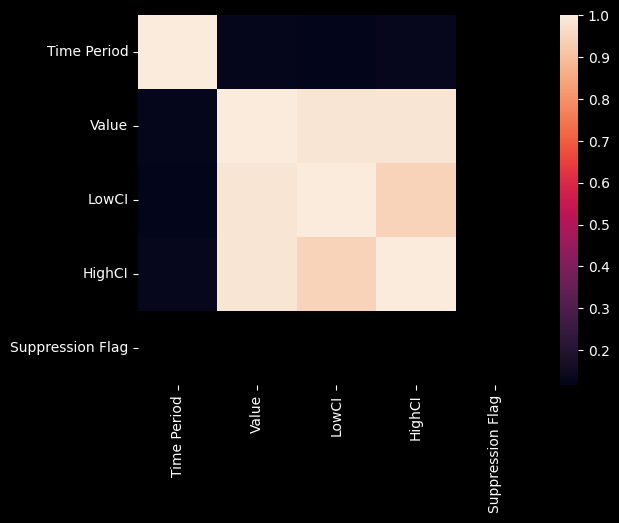

In [133]:
sns.heatmap(ment.corr())

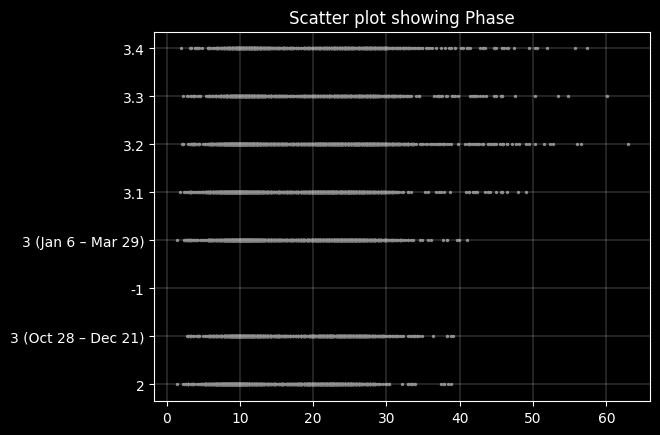

In [134]:
plt.scatter(ment.Value,ment['Phase'],c='gray',s=2)
plt.title('Scatter plot showing Phase')
plt.grid(linewidth=0.2)
plt.show()

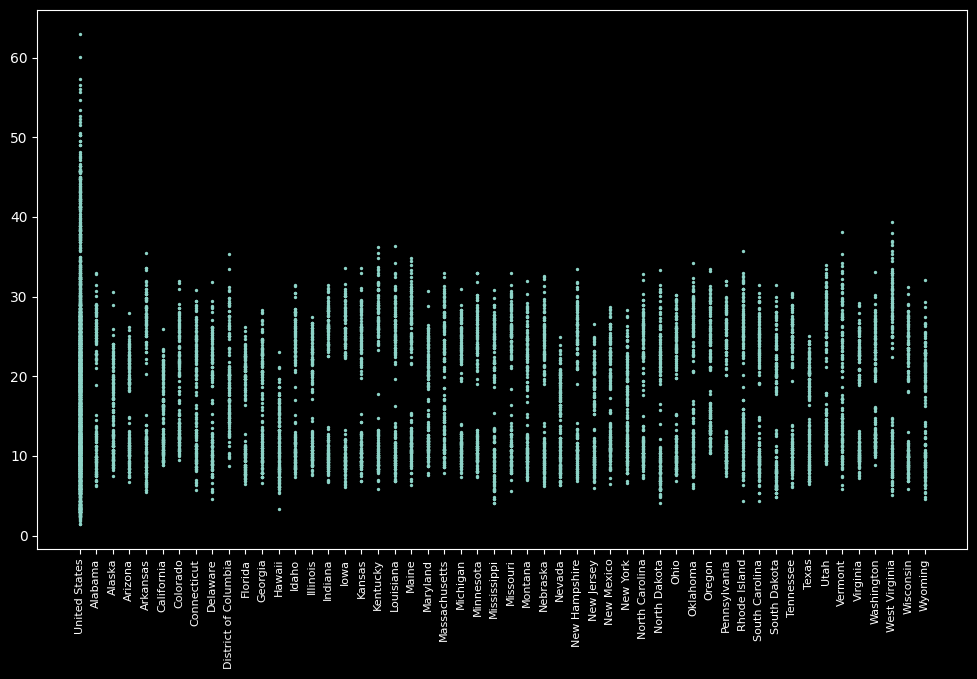

In [135]:
plt.figure(figsize=(12,7))
plt.scatter(ment.State,ment.Value,s=2)
plt.xticks(fontsize=8,rotation=90)
plt.show()

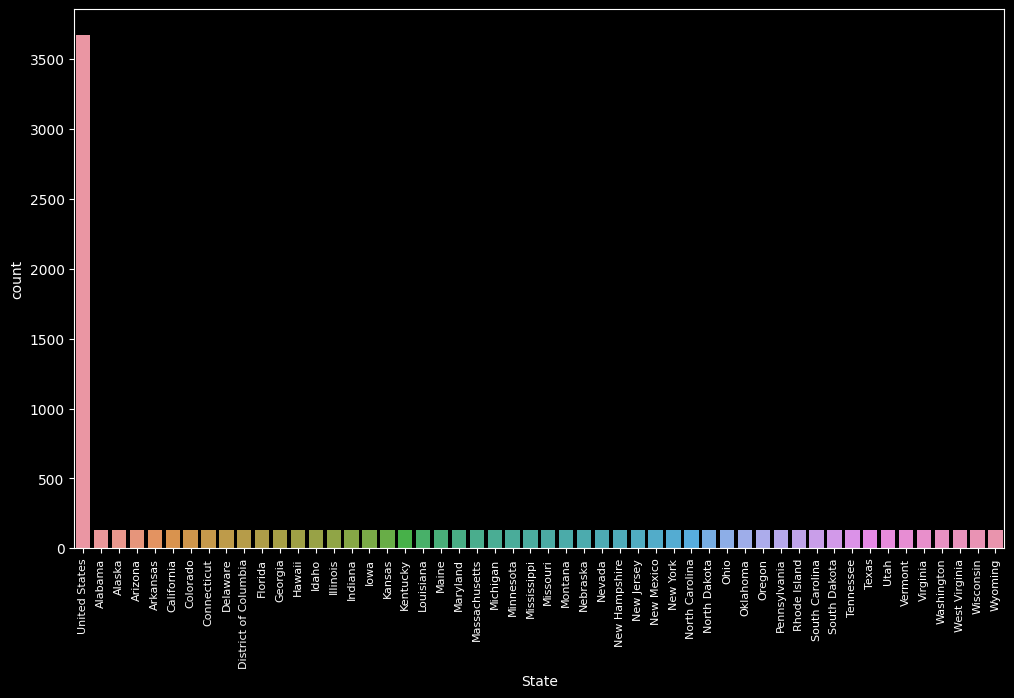

In [136]:
plt.figure(figsize=(12,7))
sns.countplot(x=ment.State,data=ment)
plt.xticks(fontsize=8,rotation=90)
plt.show()

In [137]:
states = {}
for state,i in zip(list(ment.State.unique()),range(len(ment.State.unique()))):
  states[state] = i
states

{'United States': 0,
 'Alabama': 1,
 'Alaska': 2,
 'Arizona': 3,
 'Arkansas': 4,
 'California': 5,
 'Colorado': 6,
 'Connecticut': 7,
 'Delaware': 8,
 'District of Columbia': 9,
 'Florida': 10,
 'Georgia': 11,
 'Hawaii': 12,
 'Idaho': 13,
 'Illinois': 14,
 'Indiana': 15,
 'Iowa': 16,
 'Kansas': 17,
 'Kentucky': 18,
 'Louisiana': 19,
 'Maine': 20,
 'Maryland': 21,
 'Massachusetts': 22,
 'Michigan': 23,
 'Minnesota': 24,
 'Mississippi': 25,
 'Missouri': 26,
 'Montana': 27,
 'Nebraska': 28,
 'Nevada': 29,
 'New Hampshire': 30,
 'New Jersey': 31,
 'New Mexico': 32,
 'New York': 33,
 'North Carolina': 34,
 'North Dakota': 35,
 'Ohio': 36,
 'Oklahoma': 37,
 'Oregon': 38,
 'Pennsylvania': 39,
 'Rhode Island': 40,
 'South Carolina': 41,
 'South Dakota': 42,
 'Tennessee': 43,
 'Texas': 44,
 'Utah': 45,
 'Vermont': 46,
 'Virginia': 47,
 'Washington': 48,
 'West Virginia': 49,
 'Wisconsin': 50,
 'Wyoming': 51}

In [138]:
ment.State.replace(states,inplace=True)

In [139]:
ment.drop('Quartile Range',axis=1)

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,0,United States,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN
1,Took Prescription Medication for Mental Health...,By Age,0,18 - 29 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN
2,Took Prescription Medication for Mental Health...,By Age,0,30 - 39 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN
3,Took Prescription Medication for Mental Health...,By Age,0,40 - 49 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN
4,Took Prescription Medication for Mental Health...,By Age,0,50 - 59 years,2,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10399,Needed Counseling or Therapy But Did Not Get I...,By State,47,Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,10.1,7.1,13.8,7.1 - 13.8,NaN
10400,Needed Counseling or Therapy But Did Not Get I...,By State,48,Washington,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,14.8,12.5,17.4,12.5 - 17.4,NaN
10401,Needed Counseling or Therapy But Did Not Get I...,By State,49,West Virginia,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,9.8,6.6,13.8,6.6 - 13.8,NaN
10402,Needed Counseling or Therapy But Did Not Get I...,By State,50,Wisconsin,3.4,45,"Apr 27 - May 9, 2022",04/27/2022,05/09/2022,11.6,8.5,15.3,8.5 - 15.3,NaN


In [140]:
ment.Phase.unique()

array(['2', '3 (Oct 28 – Dec 21)', '-1', '3 (Jan 6 – Mar 29)', '3.1',
       '3.2', '3.3', '3.4'], dtype=object)

In [141]:
phases={'2':2, '3 (Oct 28 – Dec 21)':3.05, '-1':-1, '3 (Jan 6 – Mar 29)':3, '3.1':3.1,
       '3.2':3.2, '3.3':3.3, '3.4':3.4}

In [142]:
ment.Phase.replace(phases,inplace=True)

In [143]:
ment.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,LowCI,HighCI,Confidence Interval,Quartile Range,Suppression Flag
0,Took Prescription Medication for Mental Health...,National Estimate,0,United States,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,19.4,19.0,19.8,19.0 - 19.8,NaN,NaN
1,Took Prescription Medication for Mental Health...,By Age,0,18 - 29 years,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.7,17.2,20.3,17.2 - 20.3,NaN,NaN
2,Took Prescription Medication for Mental Health...,By Age,0,30 - 39 years,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,18.3,17.3,19.2,17.3 - 19.2,NaN,NaN
3,Took Prescription Medication for Mental Health...,By Age,0,40 - 49 years,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,20.4,19.5,21.3,19.5 - 21.3,NaN,NaN
4,Took Prescription Medication for Mental Health...,By Age,0,50 - 59 years,2.0,13,"Aug 19 - Aug 31, 2020",08/19/2020,08/31/2020,21.2,20.2,22.2,20.2 - 22.2,NaN,NaN


In [144]:
ment.Group.unique()

array(['National Estimate', 'By Age', 'By Sex',
       'By Presence of Symptoms of Anxiety/Depression',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status', 'By Gender identity',
       'By Sexual orientation'], dtype=object)

In [145]:
print(ment.Subgroup[ment.Group=='National Estimate'].unique())
print(ment.Subgroup[ment.Group=='By Age'].unique())
print(ment.Subgroup[ment.Group=='By Sex'].unique())
print(ment.Subgroup[ment.Group=='By Presence of Symptoms of Anxiety/Depression'].unique())
print(ment.Subgroup[ment.Group=='By Race/Hispanic ethnicity'].unique())
print(ment.Subgroup[ment.Group=='By Education'].unique())
print(ment.Subgroup[ment.Group=='By State'].unique())
print(ment.Subgroup[ment.Group=='By Disability status'].unique())
print(ment.Subgroup[ment.Group=='By Gender identity'].unique())
print(ment.Subgroup[ment.Group=='By Sexual orientation'].unique())

['United States']
['18 - 29 years' '30 - 39 years' '40 - 49 years' '50 - 59 years'
 '60 - 69 years' '70 - 79 years' '80 years and above']
['Male' 'Female']
['Did not experience symptoms of anxiety/depression in the past 4 weeks'
 'Experienced symptoms of anxiety/depression in past 4 weeks']
['Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races']
['Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher"]
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North

In [146]:
subgroups = {'United States':0,'18 - 29 years':1,'30 - 39 years':2,'40 - 49 years':3,'50 - 59 years':4,
 '60 - 69 years':5,'70 - 79 years':6,'80 years and above':7,'Male':8,'Female':9,'Did not experience symptoms of anxiety/depression in the past 4 weeks':10,
 'Experienced symptoms of anxiety/depression in past 4 weeks':11,'Hispanic or Latino':12,'Non-Hispanic White, single race':13,
 'Non-Hispanic Black, single race':14,'Non-Hispanic Asian, single race':15,
 'Non-Hispanic, other races and multiple races':16,'Less than a high school diploma':17,'High school diploma or GED':18,
 "Some college/Associate's degree":19,"Bachelor's degree or higher":20,'United States': 21,
 'Alabama': 22,
 'Alaska': 23,
 'Arizona': 24,
 'Arkansas': 25,
 'California': 26,
 'Colorado': 27,
 'Connecticut': 28,
 'Delaware': 29,
 'District of Columbia': 30,
 'Florida': 31,
 'Georgia': 32,
 'Hawaii': 33,
 'Idaho': 34,
 'Illinois': 35,
 'Indiana': 36,
 'Iowa': 37,
 'Kansas': 38,
 'Kentucky': 39,
 'Louisiana': 40,
 'Maine': 41,
 'Maryland': 42,
 'Massachusetts': 43,
 'Michigan': 44,
 'Minnesota': 45,
 'Mississippi': 46,
 'Missouri': 47,
 'Montana': 48,
 'Nebraska': 49,
 'Nevada': 50,
 'New Hampshire': 51,
 'New Jersey': 52,
 'New Mexico': 53,
 'New York': 54,
 'North Carolina': 55,
 'North Dakota': 56,
 'Ohio': 57,
 'Oklahoma': 58,
 'Oregon': 59,
 'Pennsylvania': 60,
 'Rhode Island': 61,
 'South Carolina': 62,
 'South Dakota': 63,
 'Tennessee': 64,
 'Texas': 65,
 'Utah': 66,
 'Vermont': 67,
 'Virginia': 68,
 'Washington': 69,
 'West Virginia': 70,
 'Wisconsin': 71,
 'Wyoming': 72,'With disability':73,'Without disability':74,'Cis-gender male':75,'Cis-gender female':76,'Transgender':77,'Gay or lesbian':78,'Straight':79,'Bisexual':80}

In [147]:
ment.Subgroup.replace(subgroups,inplace=True)

In [148]:
ment.State.replace(states,inplace=True)

In [149]:
groups={'National Estimate':0, 'By Age':1, 'By Sex':2,
       'By Presence of Symptoms of Anxiety/Depression':3,
       'By Race/Hispanic ethnicity':4, 'By Education':5, 'By State':6,
       'By Disability status':7, 'By Gender identity':8,
       'By Sexual orientation':9}

In [150]:
ment.Group.replace(groups,inplace=True)

In [151]:
indicators={'Took Prescription Medication for Mental Health, Last 4 Weeks':0,
       'Received Counseling or Therapy, Last 4 Weeks':1,
       'Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks':2,
       'Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks':3}

In [152]:
ment.Indicator.replace(indicators,inplace=True)

In [153]:
ment.drop(['Time Period Start Date','Time Period End Date','Quartile Range','Suppression Flag','Time Period Label','Confidence Interval'],axis=1,inplace=True)

In [154]:
ment = pd.DataFrame(StandardScaler().fit_transform(ment),index=ment.index,columns=ment.columns).dropna()
ment.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Value,LowCI,HighCI
0,-1.341641,-2.703881,-0.980207,-0.733073,-0.872521,-1.370959,0.235699,0.552086,-0.074642
1,-1.341641,-2.171940,-0.980207,-1.632682,-0.872521,-1.370959,0.151057,0.317069,-0.019406
2,-1.341641,-2.171940,-0.980207,-1.587702,-0.872521,-1.370959,0.102690,0.330126,-0.140925
3,-1.341641,-2.171940,-0.980207,-1.542721,-0.872521,-1.370959,0.356616,0.617369,0.091066
4,-1.341641,-2.171940,-0.980207,-1.497741,-0.872521,-1.370959,0.453349,0.708765,0.190491


In [155]:
X = ment.drop(['LowCI','HighCI','Value'],axis=1)
X

,Indicator,Group,State,Subgroup,Phase,Time Period
0,-1.341641,-2.703881,-0.980207,-0.733073,-0.872521,-1.370959
1,-1.341641,-2.171940,-0.980207,-1.632682,-0.872521,-1.370959
2,-1.341641,-2.171940,-0.980207,-1.587702,-0.872521,-1.370959
3,-1.341641,-2.171940,-0.980207,-1.542721,-0.872521,-1.370959
4,-1.341641,-2.171940,-0.980207,-1.497741,-0.872521,-1.370959
...,...,...,...,...,...,...
10399,1.341641,0.487766,1.758204,1.381010,0.643463,1.527676
10400,1.341641,0.487766,1.816468,1.425990,0.643463,1.527676
10401,1.341641,0.487766,1.874732,1.470971,0.643463,1.527676
10402,1.341641,0.487766,1.932996,1.515951,0.643463,1.527676


In [190]:
Y=ment.Value
Y=Y.astype(float)
Y

0        0.235699
1        0.151057
2        0.102690
3        0.356616
4        0.453349
           ...   
10399   -0.888828
10400   -0.320519
10401   -0.925103
10402   -0.707452
10403   -0.719544
Name: Value, Length: 9914, dtype: float64

In [192]:
Y = np.where(Y>=1.7773882240251893,'Mentally Healthy','Mentally Unhealthy')

In [193]:
Y

array(['Mentally Unhealthy', 'Mentally Unhealthy', 'Mentally Unhealthy',
       ..., 'Mentally Unhealthy', 'Mentally Unhealthy',
       'Mentally Unhealthy'], dtype='<U18')

In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [197]:
model = SVC()
model.fit(X_train,Y_train)

SVC()

In [198]:
print(accuracy_score(model.predict(X_test),Y_test))

0.9687342410489158


In [201]:
pickle.dump(model,open('UScopehard.hdf5','wb'))